In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_encoding as se
import src.soporte_logistica_ensamble as sle


# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

In [2]:
df = pd.read_pickle('../datos/df_encoded.pkl').reset_index(drop=True) # importo mi modelo más importante
df.head()

,Age_robust,Attrition,DistanceFromHome_robust,MonthlyIncome_robust,NumCompaniesWorked_robust,PercentSalaryHike_robust,TotalWorkingYears_robust,YearsAtCompany_robust,YearsSinceLastPromotion_robust,YearsWithCurrManager_robust,...,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,1.153846,0,-0.083333,1.495430,-0.333333,-0.500000,-1.000000,-0.666667,-0.333333,-0.6,...,0.150606,0.149349,0.169076,0.142450,0.126116,0.057223,0.139531,0.112259,0.186013,0.155515
1,-0.384615,1,0.250000,-0.136563,-0.666667,1.500000,-0.444444,0.000000,0.000000,0.2,...,0.253988,0.155722,0.170456,0.187458,0.250556,0.175960,0.143672,0.160661,0.171167,0.163491
2,-0.307692,0,0.833333,2.631079,-0.333333,0.166667,-0.555556,0.000000,-0.333333,0.0,...,0.253988,0.155722,0.110225,0.172084,0.124242,0.172379,0.149717,0.160661,0.319268,0.152888
3,0.153846,0,-0.416667,0.618830,0.333333,-0.500000,0.333333,0.500000,2.000000,0.4,...,0.077491,0.156102,0.160580,0.134043,0.124242,0.147694,0.127563,0.116974,0.145384,0.163018
4,-0.307692,0,0.250000,-0.474223,0.666667,-0.333333,-0.111111,0.166667,-0.333333,0.2,...,0.149360,0.155841,0.165907,0.177812,0.258805,0.170352,0.138802,0.224400,0.146153,0.150490


In [6]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_logreg = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_logreg.head().T

,train,test
accuracy,0.843634,0.856492
precision,0.845077,0.855034
recall,0.843634,0.856492
f1,0.780779,0.802787
kappa,0.078708,0.125014
auc,0.766153,0.789273
time_seconds,0.004994,NaN
n_jobs,NaN,NaN
tiempo_computacion(segundos),NaN,0.004994
nucleos_usados,NaN,NaN


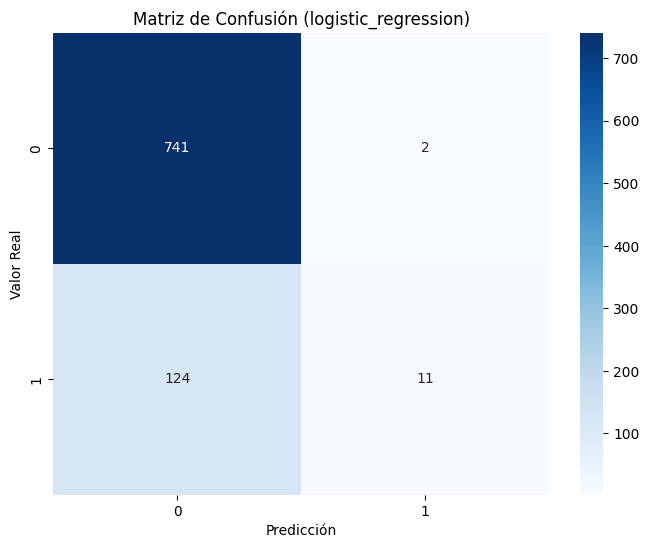

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Metricas\..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


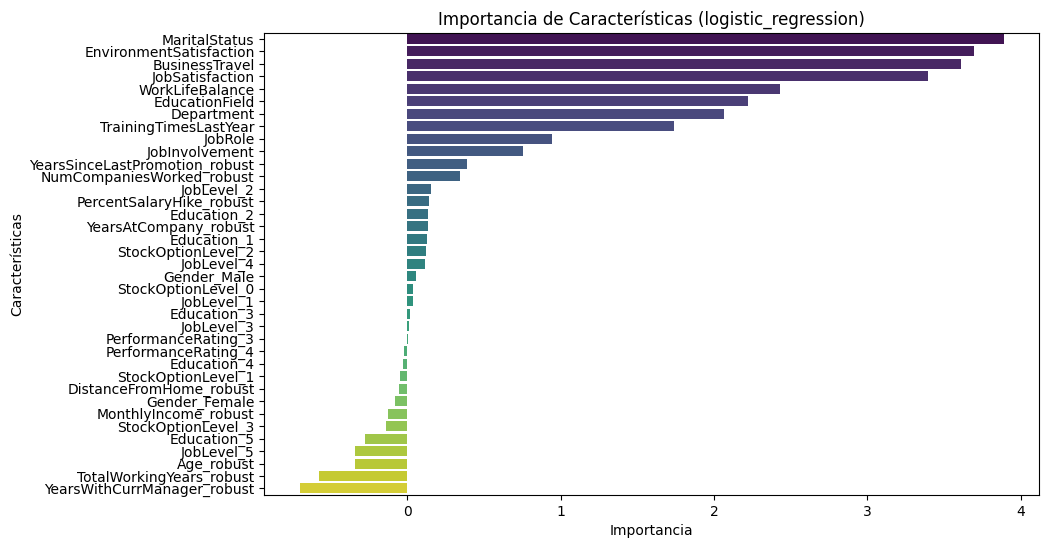

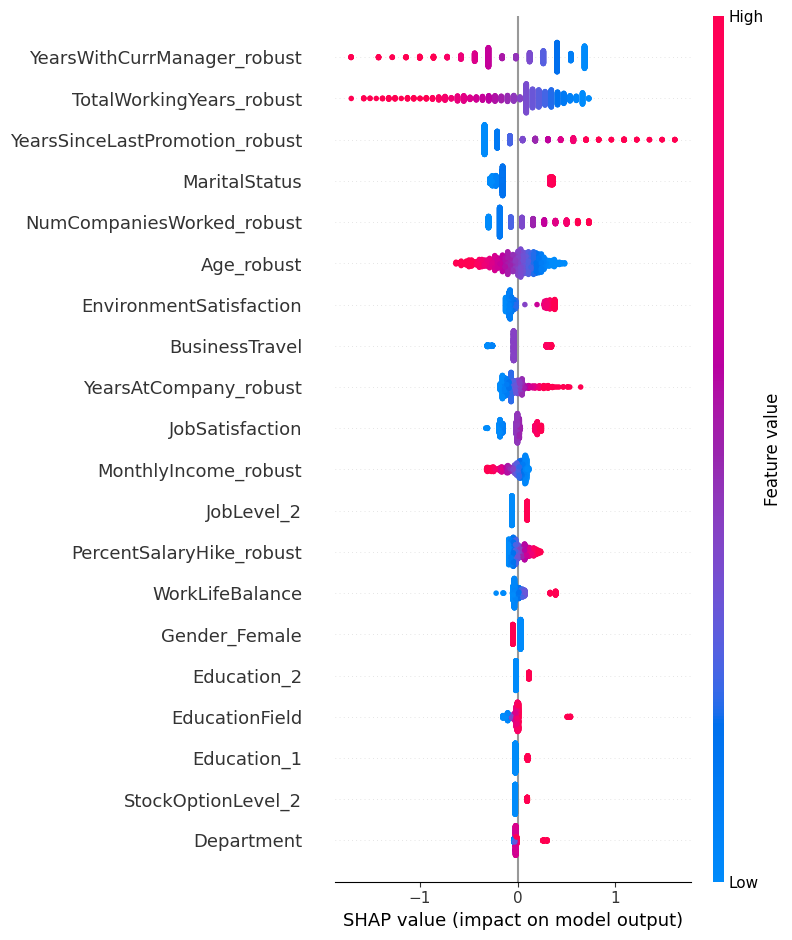

In [7]:
logistica.plot_matriz_confusion("logistic_regression")
logistica.importancia_predictores(modelo_nombre ='logistic_regression') 
logistica.plot_shap_summary(modelo_nombre="logistic_regression")

## Observaciones: pendiente

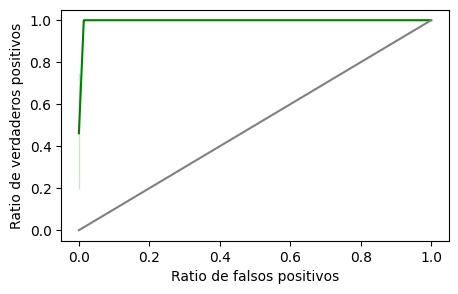

In [11]:
logistica.graficar_roc('logistic_regression')

# Random Forest

In [12]:
params_random =     {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

In [13]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest")

# llamamos al metodo para obtener los resultaods de las predicciones
df_random = logistica.calcular_metricas(modelo_nombre =  "random_forest")
df_random.head()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


El mejor modelo es RandomForestClassifier(max_depth=20, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.083574,-1.0,NaN,NaN
test,0.963554,0.965058,0.963554,0.961488,0.844905,0.992593,NaN,NaN,0.083574,-1.0


In [14]:
logistica.resultados["random_forest"]["mejor_modelo"]

RandomForestClassifier(max_depth=20, n_jobs=-1)

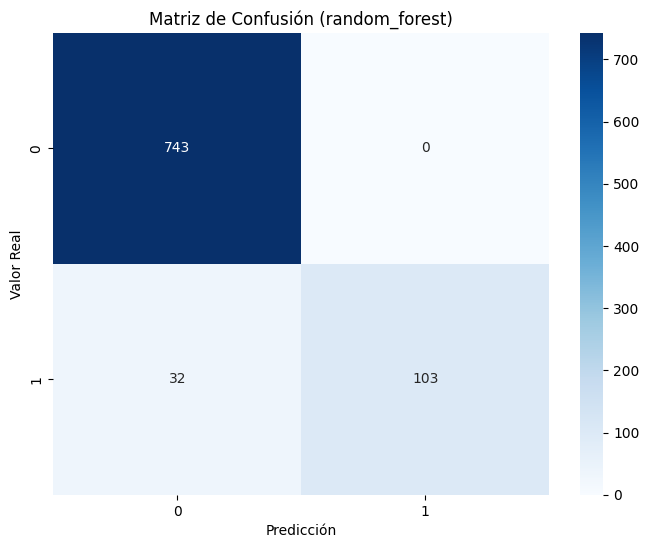

c:\Users\DELL\Git\Proyecto8---Predicci-n-de-Retenci-n-de-Empleados\Metricas\..\src\soporte_logistica_ensamble.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


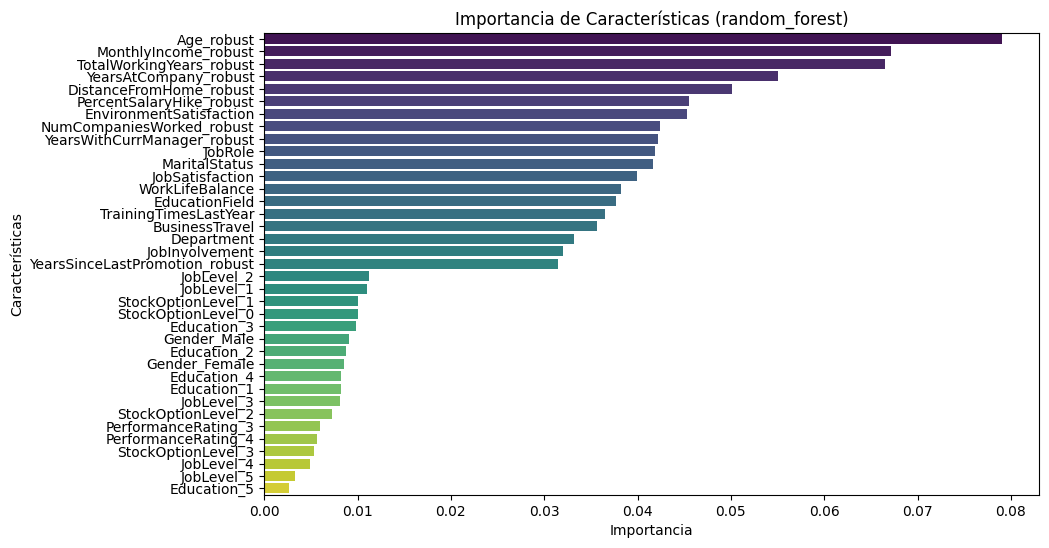

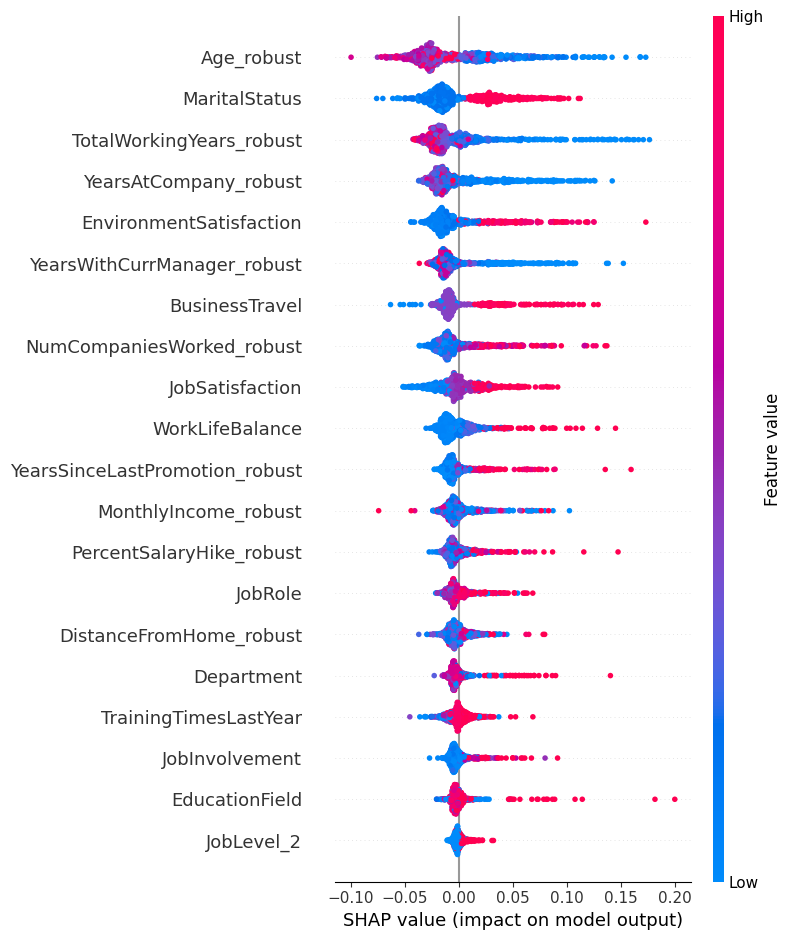

In [15]:
logistica.plot_matriz_confusion("random_forest")
logistica.importancia_predictores(modelo_nombre ='random_forest') 
logistica.plot_shap_summary(modelo_nombre="random_forest")

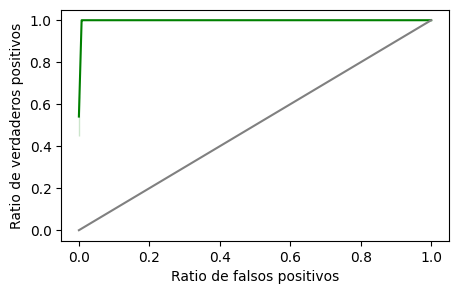

In [16]:
logistica.graficar_roc('random_forest')

# ROC

In [17]:
logistica.y_test

4239    1
3024    1
2607    0
912     0
877     0
       ..
1749    0
3554    0
256     0
4199    0
1061    0
Name: Attrition, Length: 878, dtype: int64

In [18]:
logistica.prob_train

array([9.40000000e-01, 2.67673301e-04, 1.75985222e-02, ...,
       1.00909091e-01, 5.00000000e-02, 1.00000000e-02])